In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats

In [2]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [3]:
# Merging clients and dispositions
clients = pd.read_csv("dataset/client.csv", sep=";")

disps = pd.read_csv("dataset/disp.csv", sep=";")

clients_disps = pd.merge(clients, disps, on="client_id")
#plt.title('Distribution of client\'s type', fontdict={'fontsize': 14, 'fontweight': 'bold'})
#plt.hist(clients_disps['type'])
#plt.savefig("stats/client_type_hist.png")

In [4]:
# Merging clients/dispositions and cards
cards = pd.read_csv("dataset/card_train.csv", sep=";")

cards_test = pd.read_csv("dataset/card_test.csv", sep=";")
#plt.title("Distribution of card's type", fontdict={'fontsize': 14, 'fontweight': 'bold'})
#plt.hist(cards['type'])
#plt.savefig("stats/card_type_hist.png")


clients_disps_cards = pd.merge(clients_disps, cards, on="disp_id", how="outer")
clients_disps_cards_test = pd.merge(clients_disps, cards_test, on="disp_id", how="outer")

In [5]:
def isDistNormal(col_name, test):

    #print(test["unemploymant rate '95 "])

    x, y = ecdf(test[col_name])

    plt.figure(figsize=(10,7))
    sb.set()
    plt.plot(x, y, marker=".", linestyle="none")
    plt.xlabel("Body Temperature (F)")
    plt.ylabel("Cumulative Distribution Function")

    samples = np.random.normal(np.mean(test[col_name]), np.std(test[col_name]), size=10000)

    x_theor, y_theor = ecdf(samples)

    plt.plot(x_theor, y_theor)
    plt.legend(('Empirical Data','Normal Distribution'), loc='lower right')

    #periscope.output(plt)

    print(stats.normaltest(test[col_name]))

In [6]:
# Cleaning district data
districts = pd.read_csv("dataset/district.csv", sep=";")
# Renaming code to district_id
districts.rename(columns={"code ": "district_id"}, inplace=True)
# Removing name and region
districts.drop(['name','region'], axis=1, inplace=True)

#district_g = sb.PairGrid(districts)
#district_g.map(plt.scatter)
#plt.savefig("stats/pair_plot_district_data.png")

#plt.figure(figsize=(40,6))
#plt.title("Distribution of district's unemploymant rate in '95", fontdict={'fontsize': 14, 'fontweight': 'bold'})
#plt.hist(districts["unemploymant rate '95 "])
#plt.savefig("stats/district_unemployment_rate_95_hist.png")

test = districts.loc[districts["unemploymant rate '95"] != '?']
test["unemploymant rate '95"] = [float(x) for x in test["unemploymant rate '95"]]

mean_rate = test["unemploymant rate '95"].mean()


districts["unemploymant rate '95"] = [mean_rate if x == "?" else float(x) for x in districts["unemploymant rate '95"]]

print(districts["no. of commited crimes '95"].values)


test_2 = districts.loc[districts["no. of commited crimes '95"] != '?']
test_2["no. of commited crimes '95"] = [float(x) for x in test["no. of commited crimes '95"]]

#isDistNormal("unemploymant rate '95 ", test)
#isDistNormal("no. of commited crimes '95 ", test_2)

mean_no = test_2["no. of commited crimes '95"].mean()

districts["no. of commited crimes '95"] = [mean_no if x == "?" else float(x) for x in districts["no. of commited crimes '95"]]



['85677' '2159' '2824' '5244' '2616' '2640' '4289' '5179' '2987' '3810'
 '3475' '3804' '1597' '6604' '1845' '1874' '1003' '1740' '999' '1563'
 '2299' '1089' '2879' '5198' '1822' '6041' '1029' '1580' '818' '2985'
 '1328' '4340' '4650' '5323' '3384' '5796' '4147' '2653' '4947' '6949'
 '6445' '1658' '4085' '2166' '2080' '2854' '6079' '1655' '1660' '2123'
 '3496' '2564' '1850' '18721' '3659' '2854' '3729' '2212' '2595' '1879'
 '2112' '2719' '1562' '4484' '2157' '2247' '3244' '5623' '?' '9878' '4980'
 '9672' '4355' '18782' '4063' '3736' '3460']


<ipython-input-6-1e3851be4ee1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["unemploymant rate '95"] = [float(x) for x in test["unemploymant rate '95"]]
<ipython-input-6-1e3851be4ee1>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_2["no. of commited crimes '95"] = [float(x) for x in test["no. of commited crimes '95"]]


In [7]:
# Merging districts
clients_disps_cards_districts = pd.merge(clients_disps_cards, districts, on="district_id")

clients_disps_cards_districts.drop(['district_id'], inplace=True, axis=1)

clients_disps_cards_districts_test = pd.merge(clients_disps_cards_test, districts, on="district_id")

clients_disps_cards_districts_test.drop(['district_id'], inplace=True, axis=1)


In [8]:
# Merging accounts
accounts = pd.read_csv("dataset/account.csv", sep=";")

clients_disps_cards_districts_accounts = pd.merge(clients_disps_cards_districts, accounts, on="account_id")

clients_disps_cards_districts_accounts_test = pd.merge(clients_disps_cards_districts_test, accounts, on="account_id")

#plt.title("Distribution of account's frequency", fontdict={'fontsize': 14, 'fontweight': 'bold'})
#plt.hist(accounts["frequency"])
#plt.savefig("stats/account_frequency_hist.png")

In [9]:
# Normalizing dates and adding sex

dates = clients_disps_cards_districts_accounts["birth_number"]
dates_test = clients_disps_cards_districts_accounts_test["birth_number"]

dates = [str(date)[:2] + "-" + str(date)[2:4] + "-" + str(date)[4:] for date in dates]
dates_test = [str(date)[:2] + "-" + str(date)[2:4] + "-" + str(date)[4:] for date in dates_test]

new_dates = []
new_dates_test = []
sex = []
sex_test = []

def handle_dates(dates):
    new_dates = []
    sex = []
    for date in dates:
        month = int(date[3:5])
        gender = ""
        if month > 12:
            month = month - 50
            gender = "female"
        else:
            gender = "male"
        if month < 10:
            month = "0" + str(month)
        else:
            month = str(month)
        new_dates.append(date[0:2] + "-" + month + "-" + date[6:8])
        sex.append(gender)
    return (new_dates, sex)

"""
for date in dates_test:
    month = int(date[3:5])
    gender = ""
    if month > 12:
        month = month - 50
        gender = "female"
    else:
        gender = "male"
    if month < 10:
        month = "0" + str(month)
    else:
        month = str(month)
    new_dates_test.append(date[0:2] + "-" + month + "-" + date[6:8])
    sex_test.append(gender)
""" 
new_dates, sex = handle_dates(dates)
new_dates_test, sex_test = handle_dates(dates_test)

ages = []
for date in new_dates:
    year = int("19" + date[0:2])
    age = 2021 - year
    ages.append(age)
    
ages_test = []
for date in new_dates_test:
    year = int("19" + date[0:2])
    age = 2021 - year
    ages_test.append(age)
    
#date_sex = {"age": ages, "sex": sex}
#date_sex_df = pd.DataFrame(date_sex)

clients_disps_cards_districts_accounts = clients_disps_cards_districts_accounts.drop(["birth_number"], axis=1)
clients_disps_cards_districts_accounts_test = clients_disps_cards_districts_accounts_test.drop(["birth_number"], axis=1)

people_account_data = clients_disps_cards_districts_accounts.assign(sex = sex, age = ages)
people_account_data_test = clients_disps_cards_districts_accounts_test.assign(sex = sex_test, age = ages_test)
people_account_data_test


,client_id,disp_id,account_id,type_disp,card_id,type_card,date_card,no. of inhabitants,no. of municipalities with inhabitants < 499,no. of municipalities with inhabitants 500-1999,...,unemploymant rate '95,unemploymant rate '96,no. of enterpreneurs per 1000 inhabitants,no. of commited crimes '95,no. of commited crimes '96,district_id,frequency,date_account,sex,age
0,1,1,1,OWNER,NaN,NaN,NaN,70699,60,13,...,2.83,3.35,131,1740.0,1910,18,monthly issuance,950324,female,51
1,420,420,343,OWNER,NaN,NaN,NaN,70699,60,13,...,2.83,3.35,131,1740.0,1910,18,monthly issuance,940426,male,43
2,499,499,413,OWNER,NaN,NaN,NaN,70699,60,13,...,2.83,3.35,131,1740.0,1910,18,monthly issuance,960709,female,86
3,519,519,431,OWNER,NaN,NaN,NaN,70699,60,13,...,2.83,3.35,131,1740.0,1910,18,monthly issuance,961105,male,41
4,682,682,568,OWNER,NaN,NaN,NaN,70699,60,13,...,2.83,3.35,131,1740.0,1910,18,monthly issuance,950328,male,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5364,9930,9622,8039,OWNER,NaN,NaN,NaN,81344,61,23,...,3.39,3.97,149,2987.0,2487,9,monthly issuance,951217,male,49
5365,10070,9762,8153,OWNER,NaN,NaN,NaN,81344,61,23,...,3.39,3.97,149,2987.0,2487,9,monthly issuance,970702,male,47
5366,11266,10958,9153,OWNER,NaN,NaN,NaN,81344,61,23,...,3.39,3.97,149,2987.0,2487,9,monthly issuance,961212,male,83
5367,11267,10959,9153,DISPONENT,NaN,NaN,NaN,81344,61,23,...,3.39,3.97,149,2987.0,2487,9,monthly issuance,961212,female,85


In [10]:
# Merging the rest?

transaction = pd.read_csv("dataset/trans_train.csv", sep=";")
transaction_test = pd.read_csv("dataset/trans_test.csv", sep=";")

transaction["type_trans"] = [i if i != "withdrawal in cash" else "withdrawal" for i in transaction["type_trans"]]
transaction["k_symbol"] = ["" if type(i) != str or i == " " else i for i in transaction["k_symbol"]]
transaction["operation"] = ["" if type(i) == float else i for i in transaction["operation"]]

transaction_test["type_trans"] = [i if i != "withdrawal in cash" else "withdrawal" for i in transaction_test["type_trans"]]
transaction_test["k_symbol"] = ["" if type(i) != str or i == " " else i for i in transaction_test["k_symbol"]]
transaction_test["operation"] = ["" if type(i) == float else i for i in transaction_test["operation"]]



"""account_loan_trans = pd.merge(people_account_data, transaction, on="account_id")
account_loan_trans_test = pd.merge(people_account_data_test, transaction_test, on="account_id")

loan = pd.read_csv("dataset/loan_train.csv", sep=";")
loan_test = pd.read_csv("dataset/loan_test.csv", sep=";")


"""


def get_transactions_info(transaction):
    
    grouped = transaction.groupby(["account_id"])
    #print(grouped["type_trans"].get_group(1).value_counts().to_dict()["credit"])
    n_credits = []
    n_withdrawals = []
    total_transfer_amount = []
    min_amounts = []
    max_amounts = []
    cov_transfers = []
    mean_transfers = []
    std_transfers = []
    std_balance = []
    min_balance = []
    max_balance = []
    mean_balance = []

    for key in grouped.groups.keys():
        dict_group = grouped["type_trans"].get_group(key).value_counts().to_dict()
        if "withdrawal" not in dict_group.keys():
            dict_group["withdrawal"] = 0
        n_credits.append(dict_group["credit"])
        n_withdrawals.append(dict_group["withdrawal"])

        total_transfer_amount.append(grouped["amount_trans"].get_group(key).sum())
        min_amounts.append(grouped["amount_trans"].get_group(key).min())
        max_amounts.append(grouped["amount_trans"].get_group(key).max())
        cov_transfers.append(grouped["balance"].get_group(key).cov(grouped["amount_trans"].get_group(key)))
        
        mean_transfers.append(grouped["amount_trans"].get_group(key).mean())
        std_transfers.append(grouped["amount_trans"].get_group(key).std())
        
        min_balance.append(grouped["balance"].get_group(key).min())
        max_balance.append(grouped["balance"].get_group(key).max())
        mean_balance.append(grouped["balance"].get_group(key).mean())
    
    df = pd.DataFrame({"account_id": grouped.groups.keys(), "n_credits": n_credits,
                      "n_withdrawals": n_withdrawals, "total_transfer_amount": total_transfer_amount,
                      "min_amount": min_amounts, "max_amount": max_amounts,
                      "cov_transfers": cov_transfers, "mean_transfers": mean_transfers,
                      "std_transfers": std_transfers, "min_balance": min_balance,
                      "max_balance": max_balance, "mean_balance": mean_balance} )
    return df
    
#get_transactions_info(transaction)
#transaction["account_id"].unique()

account_loan_trans = pd.merge(people_account_data, get_transactions_info(transaction), on="account_id")
account_loan_trans_test = pd.merge(people_account_data_test, get_transactions_info(transaction_test), on="account_id")

loan = pd.read_csv("dataset/loan_train.csv", sep=";")
loan_test = pd.read_csv("dataset/loan_test.csv", sep=";")

complete_df = pd.merge(loan, account_loan_trans, on="account_id", how="left")
complete_df_test = pd.merge(loan_test, account_loan_trans_test, on="account_id", how="left")
complete_df_test
#complete_df["loan_id"].isnull().sum()
#account_loan_data_test = pd.merge(account_loan_trans_test, loan_test, on="account_id", how="outer")
#len(loan["account_id"].unique())
#account_loan_trans = pd.merge()

#print("     OPERATION")
#print(transaction["operation"].value_counts())
#print(transaction["operation"].isnull().sum())z
#print("     K_SYMBOL")
#print(transaction["k_symbol"].value_counts())

#plt.title("Distribution of transaction's type", fontdict={'fontsize': 14, 'fontweight': 'bold'})
#plt.hist(transaction["type"])
#plt.savefig("stats/transaction_type_hist.png")

#plt.figure(figsize=(20,6))
#plt.title("Distribution of transaction's operation", fontdict={'fontsize': 14, 'fontweight': 'bold'})
#plt.hist(transaction["operation"])
#plt.savefig("stats/transaction_operation_hist.png")

#plt.figure(figsize=(20,6))
#plt.title("Distribution of transaction's k_symbol", fontdict={'fontsize': 14, 'fontweight': 'bold'})
#plt.hist(transaction["k_symbol"])
#plt.savefig("stats/transaction_k_symbol_hist.png")

#plt.figure(figsize=(20,6))
#plt.title("Distribution of transaction's balance", fontdict={'fontsize': 14, 'fontweight': 'bold'})
#plt.hist(transaction["balance"])
#plt.savefig("stats/transaction_balance_hist.png")

#plt.figure(figsize=(10,6))
#plt.title("Distribution of transaction's amount", fontdict={'fontsize': 14, 'fontweight': 'bold'})
#plt.hist(transaction["amount"])
#plt.savefig("stats/transaction_amount_hist.png")

#plt.figure(figsize=(10,6))
#plt.title("Distribution of loan's payments", fontdict={'fontsize': 14, 'fontweight': 'bold'})
#plt.hist(loan["payments"])
#plt.savefig("stats/loan_payments_hist.png")

#plt.figure(figsize=(10,6))
#plt.title("Distribution of loan's duration", fontdict={'fontsize': 14, 'fontweight': 'bold'})
#plt.hist(loan["duration"])
#plt.savefig("stats/loan_duration_hist.png")

#plt.figure(figsize=(10,6))
#plt.title("Distribution of loan's amount", fontdict={'fontsize': 14, 'fontweight': 'bold'})
#plt.hist(loan["amount"])
#plt.savefig("stats/loan_amount_hist.png")


C:\Users\caion\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\caion\anaconda3\lib\site-packages\pandas\core\nanops.py:1516: RuntimeWarning: Degrees of freedom <= 0 for slice
  return np.cov(a, b, ddof=ddof)[0, 1]
C:\Users\caion\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,loan_id,account_id,date_loan,amount_loan,duration,payments,status,client_id,disp_id,type_disp,...,n_withdrawals,total_transfer_amount,min_amount,max_amount,cov_transfers,mean_transfers,std_transfers,min_balance,max_balance,mean_balance
0,5895,4473,970103,93960,60,1566,NaN,5395,5395,OWNER,...,59,716604.6,14.6,36637.5,2.275876e+07,8051.737079,10150.183864,800.0,88246.7,54520.202247
1,7122,10365,970104,260640,36,7240,NaN,12756,12448,OWNER,...,49,540987.2,4.6,41871.0,9.633182e+07,6935.733333,10429.912040,-718.6,88731.8,31518.182051
2,6173,5724,970108,232560,48,4845,NaN,6922,6922,OWNER,...,133,1270259.9,45.7,43605.0,7.593892e+07,7217.385795,10657.223460,200.0,79286.6,40175.612500
3,6142,5591,970121,221880,60,3698,NaN,6749,6749,OWNER,...,50,456587.5,2.0,33280.0,3.518773e+07,6430.809859,8954.191750,1000.0,74216.8,44440.912676
4,6142,5591,970121,221880,60,3698,NaN,6750,6750,DISPONENT,...,50,456587.5,2.0,33280.0,3.518773e+07,6430.809859,8954.191750,1000.0,74216.8,44440.912676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,4989,105,981205,352704,48,7348,NaN,127,127,OWNER,...,27,480617.8,14.6,49101.0,9.583772e+07,8582.460714,11708.497821,800.0,74693.6,30797.487500
420,5221,1284,981205,52512,12,4376,NaN,1554,1554,OWNER,...,49,1086782.4,10.9,49972.0,1.452346e+08,12491.751724,13801.934777,1000.0,120419.7,59684.298851
421,6402,6922,981206,139488,24,5812,NaN,8356,8356,OWNER,...,65,1353674.6,30.0,52305.0,1.465180e+08,13016.101923,14442.218411,1100.0,95976.0,46755.305769
422,5346,1928,981206,55632,24,2318,NaN,2342,2342,OWNER,...,64,688589.7,14.6,23522.0,9.766202e+06,6040.260526,6657.188842,500.0,52896.1,29645.320175


In [11]:
"""
    REPLACE OWNER/DISPONENT BY NUMBER OF ACCOUNT MEMBERS
    
"""
def get_members(complete_df):

    n_members = []

    for disp in complete_df["type_disp"]:
        if disp == "OWNER":
            n_members.append(1)
        else:
            n_members.append(2)
    complete_df["n_members"] = n_members

    complete_df.drop_duplicates(subset = ["loan_id"],keep = "last", inplace=True)
    return complete_df.drop(columns=["type_disp"])


complete_df = get_members(complete_df)

complete_df_test = get_members(complete_df_test)
complete_df_test

,loan_id,account_id,date_loan,amount_loan,duration,payments,status,client_id,disp_id,card_id,...,total_transfer_amount,min_amount,max_amount,cov_transfers,mean_transfers,std_transfers,min_balance,max_balance,mean_balance,n_members
0,5895,4473,970103,93960,60,1566,NaN,5395,5395,NaN,...,716604.6,14.6,36637.5,2.275876e+07,8051.737079,10150.183864,800.0,88246.7,54520.202247,1
1,7122,10365,970104,260640,36,7240,NaN,12756,12448,NaN,...,540987.2,4.6,41871.0,9.633182e+07,6935.733333,10429.912040,-718.6,88731.8,31518.182051,1
2,6173,5724,970108,232560,48,4845,NaN,6922,6922,NaN,...,1270259.9,45.7,43605.0,7.593892e+07,7217.385795,10657.223460,200.0,79286.6,40175.612500,1
4,6142,5591,970121,221880,60,3698,NaN,6750,6750,NaN,...,456587.5,2.0,33280.0,3.518773e+07,6430.809859,8954.191750,1000.0,74216.8,44440.912676,2
5,5358,2018,970121,38520,12,3210,NaN,2451,2451,NaN,...,270552.4,14.6,8800.0,2.001619e+05,2373.266667,2066.323784,900.0,31302.0,20231.313158,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,4989,105,981205,352704,48,7348,NaN,127,127,17.0,...,480617.8,14.6,49101.0,9.583772e+07,8582.460714,11708.497821,800.0,74693.6,30797.487500,1
420,5221,1284,981205,52512,12,4376,NaN,1554,1554,NaN,...,1086782.4,10.9,49972.0,1.452346e+08,12491.751724,13801.934777,1000.0,120419.7,59684.298851,1
421,6402,6922,981206,139488,24,5812,NaN,8356,8356,NaN,...,1353674.6,30.0,52305.0,1.465180e+08,13016.101923,14442.218411,1100.0,95976.0,46755.305769,1
422,5346,1928,981206,55632,24,2318,NaN,2342,2342,NaN,...,688589.7,14.6,23522.0,9.766202e+06,6040.260526,6657.188842,500.0,52896.1,29645.320175,1


In [12]:
# Dropping ids
loanIDs = complete_df_test["loan_id"].values

toDrop = ["client_id", "district_id", "disp_id", "card_id", "account_id", "loan_id"]

no_ids = complete_df.drop(toDrop, axis=1)
no_ids_test = complete_df_test.drop(toDrop, axis=1)
no_ids

,date_loan,amount_loan,duration,payments,status,type_card,date_card,no. of inhabitants,no. of municipalities with inhabitants < 499,no. of municipalities with inhabitants 500-1999,...,total_transfer_amount,min_amount,max_amount,cov_transfers,mean_transfers,std_transfers,min_balance,max_balance,mean_balance,n_members
0,930705,96396,12,8033,-1,NaN,NaN,94812,15,13,...,20100.0,1100.0,9900.0,9.218333e+06,5025.000000,3774.806838,1100.0,20100.0,12250.000000,1
1,930711,165960,36,4610,1,NaN,NaN,112709,48,20,...,407578.5,2.9,54300.0,1.619818e+08,11015.635135,14040.410910,700.0,120512.8,52083.859459,1
2,930728,127080,60,2118,1,NaN,NaN,77917,85,19,...,130019.0,48.6,19065.0,2.190403e+07,5417.458333,6209.075792,800.0,49590.4,30060.954167,1
3,930803,105804,36,2939,1,NaN,NaN,177686,69,27,...,206327.0,14.6,26448.0,3.327420e+07,8253.080000,7773.338886,1000.0,65898.5,41297.480000,1
4,930906,274740,60,4579,1,NaN,NaN,86513,38,36,...,511541.1,30.0,63366.0,3.786512e+08,18945.966667,19355.220502,600.0,122893.1,57188.211111,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,961212,155616,48,3242,1,NaN,NaN,226122,32,50,...,842107.6,14.6,36960.0,2.698411e+07,4895.974419,7083.509780,200.0,75294.1,44197.509884,2
399,961215,222180,60,3703,-1,NaN,NaN,45714,52,10,...,691804.2,14.6,52600.0,1.251341e+08,11725.494915,13888.269077,800.0,130659.1,55230.444068,1
400,961221,45024,48,938,1,NaN,NaN,285387,0,2,...,303412.8,14.6,31636.5,4.086266e+07,7779.815385,10082.311519,800.0,63659.3,41994.907692,1
401,961225,115812,36,3217,1,NaN,NaN,93931,74,21,...,1646730.5,14.6,50800.0,1.248316e+08,13280.084677,14709.909902,1100.0,119527.2,56646.516129,1


In [13]:
#get loan years

def get_years(df):
    years = []
    for date in df["date_loan"]:
        years.append(int("19" + str(date)[:2]))
    df["loan_year"] = years
    
get_years(no_ids)
get_years(no_ids_test)


4 Columns that might be dropped: ["unemploymant rate '96", "no. of commited crimes '95", "no. of commited crimes '96", 'loan_year']


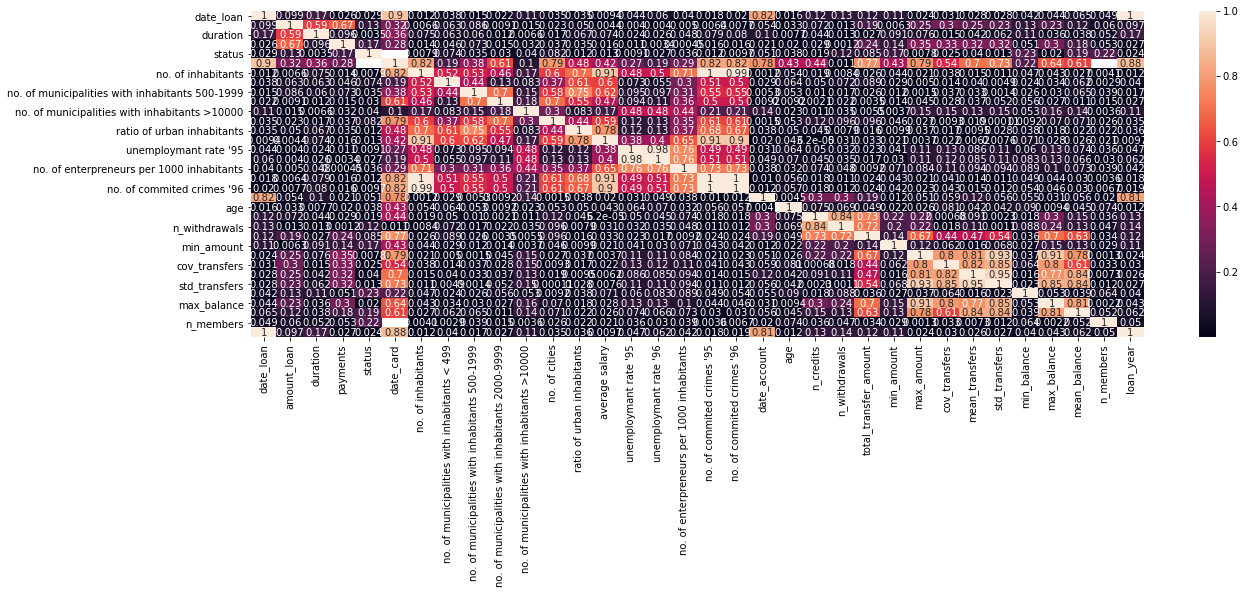

In [14]:
# Removing related columns
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# Create correlation matrix
corr_matrix = no_ids.corr().abs()
plt.figure(figsize = (20,6))
sb.heatmap(corr_matrix,annot=True)

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
#no_ids.drop(to_drop, axis=1, inplace=True)
#no_ids_test.drop(to_drop, axis=1, inplace=True)

print("{} Columns that might be dropped: {}".format(len(to_drop), to_drop) )


In [15]:
no_ids

,date_loan,amount_loan,duration,payments,status,type_card,date_card,no. of inhabitants,no. of municipalities with inhabitants < 499,no. of municipalities with inhabitants 500-1999,...,min_amount,max_amount,cov_transfers,mean_transfers,std_transfers,min_balance,max_balance,mean_balance,n_members,loan_year
0,930705,96396,12,8033,-1,NaN,NaN,94812,15,13,...,1100.0,9900.0,9.218333e+06,5025.000000,3774.806838,1100.0,20100.0,12250.000000,1,1993
1,930711,165960,36,4610,1,NaN,NaN,112709,48,20,...,2.9,54300.0,1.619818e+08,11015.635135,14040.410910,700.0,120512.8,52083.859459,1,1993
2,930728,127080,60,2118,1,NaN,NaN,77917,85,19,...,48.6,19065.0,2.190403e+07,5417.458333,6209.075792,800.0,49590.4,30060.954167,1,1993
3,930803,105804,36,2939,1,NaN,NaN,177686,69,27,...,14.6,26448.0,3.327420e+07,8253.080000,7773.338886,1000.0,65898.5,41297.480000,1,1993
4,930906,274740,60,4579,1,NaN,NaN,86513,38,36,...,30.0,63366.0,3.786512e+08,18945.966667,19355.220502,600.0,122893.1,57188.211111,1,1993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,961212,155616,48,3242,1,NaN,NaN,226122,32,50,...,14.6,36960.0,2.698411e+07,4895.974419,7083.509780,200.0,75294.1,44197.509884,2,1996
399,961215,222180,60,3703,-1,NaN,NaN,45714,52,10,...,14.6,52600.0,1.251341e+08,11725.494915,13888.269077,800.0,130659.1,55230.444068,1,1996
400,961221,45024,48,938,1,NaN,NaN,285387,0,2,...,14.6,31636.5,4.086266e+07,7779.815385,10082.311519,800.0,63659.3,41994.907692,1,1996
401,961225,115812,36,3217,1,NaN,NaN,93931,74,21,...,14.6,50800.0,1.248316e+08,13280.084677,14709.909902,1100.0,119527.2,56646.516129,1,1996


In [16]:
#select columns that can be dropped
to_drop.remove("loan_year")
to_drop += ["duration", "payments", "date_loan"]
no_ids.drop(to_drop, axis=1, inplace=True)
no_ids_test.drop(to_drop, axis=1, inplace=True)
no_ids

,amount_loan,status,type_card,date_card,no. of inhabitants,no. of municipalities with inhabitants < 499,no. of municipalities with inhabitants 500-1999,no. of municipalities with inhabitants 2000-9999,no. of municipalities with inhabitants >10000,no. of cities,...,min_amount,max_amount,cov_transfers,mean_transfers,std_transfers,min_balance,max_balance,mean_balance,n_members,loan_year
0,96396,-1,NaN,NaN,94812,15,13,8,2,10,...,1100.0,9900.0,9.218333e+06,5025.000000,3774.806838,1100.0,20100.0,12250.000000,1,1993
1,165960,1,NaN,NaN,112709,48,20,7,3,10,...,2.9,54300.0,1.619818e+08,11015.635135,14040.410910,700.0,120512.8,52083.859459,1,1993
2,127080,1,NaN,NaN,77917,85,19,6,1,5,...,48.6,19065.0,2.190403e+07,5417.458333,6209.075792,800.0,49590.4,30060.954167,1,1993
3,105804,1,NaN,NaN,177686,69,27,10,1,9,...,14.6,26448.0,3.327420e+07,8253.080000,7773.338886,1000.0,65898.5,41297.480000,1,1993
4,274740,1,NaN,NaN,86513,38,36,5,1,5,...,30.0,63366.0,3.786512e+08,18945.966667,19355.220502,600.0,122893.1,57188.211111,1,1993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,155616,1,NaN,NaN,226122,32,50,7,4,4,...,14.6,36960.0,2.698411e+07,4895.974419,7083.509780,200.0,75294.1,44197.509884,2,1996
399,222180,-1,NaN,NaN,45714,52,10,5,1,6,...,14.6,52600.0,1.251341e+08,11725.494915,13888.269077,800.0,130659.1,55230.444068,1,1996
400,45024,1,NaN,NaN,285387,0,2,8,5,7,...,14.6,31636.5,4.086266e+07,7779.815385,10082.311519,800.0,63659.3,41994.907692,1,1996
401,115812,1,NaN,NaN,93931,74,21,10,1,8,...,14.6,50800.0,1.248316e+08,13280.084677,14709.909902,1100.0,119527.2,56646.516129,1,1996


In [17]:
# Removing rows with nan values for status
no_ids.dropna(subset=["status"], inplace=True)

#print(no_ids.drop_duplicates(inplace=True)
print(no_ids["status"].value_counts())

no_ids

 1    282
-1     46
Name: status, dtype: int64


,amount_loan,status,type_card,date_card,no. of inhabitants,no. of municipalities with inhabitants < 499,no. of municipalities with inhabitants 500-1999,no. of municipalities with inhabitants 2000-9999,no. of municipalities with inhabitants >10000,no. of cities,...,min_amount,max_amount,cov_transfers,mean_transfers,std_transfers,min_balance,max_balance,mean_balance,n_members,loan_year
0,96396,-1,NaN,NaN,94812,15,13,8,2,10,...,1100.0,9900.0,9.218333e+06,5025.000000,3774.806838,1100.0,20100.0,12250.000000,1,1993
1,165960,1,NaN,NaN,112709,48,20,7,3,10,...,2.9,54300.0,1.619818e+08,11015.635135,14040.410910,700.0,120512.8,52083.859459,1,1993
2,127080,1,NaN,NaN,77917,85,19,6,1,5,...,48.6,19065.0,2.190403e+07,5417.458333,6209.075792,800.0,49590.4,30060.954167,1,1993
3,105804,1,NaN,NaN,177686,69,27,10,1,9,...,14.6,26448.0,3.327420e+07,8253.080000,7773.338886,1000.0,65898.5,41297.480000,1,1993
4,274740,1,NaN,NaN,86513,38,36,5,1,5,...,30.0,63366.0,3.786512e+08,18945.966667,19355.220502,600.0,122893.1,57188.211111,1,1993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,155616,1,NaN,NaN,226122,32,50,7,4,4,...,14.6,36960.0,2.698411e+07,4895.974419,7083.509780,200.0,75294.1,44197.509884,2,1996
399,222180,-1,NaN,NaN,45714,52,10,5,1,6,...,14.6,52600.0,1.251341e+08,11725.494915,13888.269077,800.0,130659.1,55230.444068,1,1996
400,45024,1,NaN,NaN,285387,0,2,8,5,7,...,14.6,31636.5,4.086266e+07,7779.815385,10082.311519,800.0,63659.3,41994.907692,1,1996
401,115812,1,NaN,NaN,93931,74,21,10,1,8,...,14.6,50800.0,1.248316e+08,13280.084677,14709.909902,1100.0,119527.2,56646.516129,1,1996


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, f1_score
list_train = []
list_test = []


all_columns = list(set(list(no_ids.columns) + list(no_ids_test.columns)))

for i in all_columns:
    if i not in list(no_ids.columns):
        no_ids[i] = [0] * len(no_ids)
        
    if i not in list(no_ids_test.columns):
        print(i)
        no_ids_test[i] = [0] * len(no_ids_test)
    if no_ids.get(i).dtype == object:
        list_train.append(i)
        
    if no_ids_test.get(i).dtype == object:
        list_test.append(i)
        
no_ids = pd.get_dummies(no_ids, columns = list_train)
no_ids_test = pd.get_dummies(no_ids_test, columns = list_test)   
no_ids["date_card"].fillna(0, inplace=True)

no_ids_test["date_card"].fillna(0, inplace=True)


type_card_gold


In [29]:

# Removing labels and creating another dataset for them
all_inputs = no_ids.drop(columns=["status"]).values
all_labels = no_ids["status"].values

# Split data into training and testing sets
# Split is based on the loan date
train = no_ids.loc[no_ids["loan_year"] < 1996]
test = no_ids.loc[no_ids["loan_year"] == 1996]

inputs_train = train.drop(columns=["status"]).values
labels_train = train["status"].values

inputs_test = test.drop(columns=["status"]).values
labels_test = test["status"].values

#(inputs_train, inputs_test, labels_train, labels_test) = train_test_split(all_inputs, all_labels, test_size=0.2, stratify=no_ids['status'])


In [30]:
print(f"Training set: {len(inputs_train)} elements")
print(f"Testing set: {len(inputs_test)} elements")


Training set: 211 elements
Testing set: 117 elements


In [21]:
rf_classifier = RandomForestClassifier()

rf_grid_search = GridSearchCV(rf_classifier, scoring="roc_auc", cv=5, param_grid={})
rf_grid_search.fit(inputs_train, labels_train)
print('Best score: {}'.format(rf_grid_search.best_score_))


print(53 * '=')
print("TRAIN")
predictions_train = rf_grid_search.predict(inputs_train)
print("F1 Score: {}".format(f1_score(labels_train, predictions_train)))
print(f"ROC: {roc_auc_score(labels_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(labels_train, predictions_train, target_names=['not pay', 'pay']))
print(53 * '=')
print("TEST")
predictions_test = rf_grid_search.predict(inputs_test) 
print("F1 Score: {}".format(f1_score(labels_test, predictions_test)))
print(f"ROC: {roc_auc_score(labels_test, predictions_test)}")
print("Classification Report: ")
print(classification_report(labels_test, predictions_test, target_names=['not pay', 'pay']))

Best score: 0.6918293293293294
TRAIN
F1 Score: 1.0
ROC: 1.0
Classification Report: 
              precision    recall  f1-score   support

     not pay       1.00      1.00      1.00        30
         pay       1.00      1.00      1.00       181

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211

TEST
F1 Score: 0.9345794392523366
ROC: 0.588799504950495
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.75      0.19      0.30        16
         pay       0.88      0.99      0.93       101

    accuracy                           0.88       117
   macro avg       0.82      0.59      0.62       117
weighted avg       0.87      0.88      0.85       117



In [22]:
dt_classifier = DecisionTreeClassifier(min_samples_leaf = 10)

dt_grid_search = GridSearchCV(dt_classifier, scoring="precision_weighted", cv=5, param_grid={})
dt_grid_search.fit(inputs_train, labels_train)
print('Best score: {}'.format(dt_grid_search.best_score_))


print(53 * '=')
print("TRAIN")
predictions_train = dt_grid_search.predict(inputs_train)
print("F1 Score: {}".format(f1_score(labels_train, predictions_train)))
print(f"ROC: {roc_auc_score(labels_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(labels_train, predictions_train, target_names=['not pay', 'pay']))
print(53 * '=')
print("TEST")
predictions_test = dt_grid_search.predict(inputs_test) 
print("F1 Score: {}".format(f1_score(labels_test, predictions_test)))
print(f"ROC: {roc_auc_score(labels_test, predictions_test)}")
print("Classification Report: ")
print(classification_report(labels_test, predictions_test, target_names=['not pay', 'pay']))

Best score: 0.8087945480600828
TRAIN
F1 Score: 0.947945205479452
ROC: 0.7945672191528544
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.70      0.63      0.67        30
         pay       0.94      0.96      0.95       181

    accuracy                           0.91       211
   macro avg       0.82      0.79      0.81       211
weighted avg       0.91      0.91      0.91       211

TEST
F1 Score: 0.9178743961352657
ROC: 0.6265470297029703
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.45      0.31      0.37        16
         pay       0.90      0.94      0.92       101

    accuracy                           0.85       117
   macro avg       0.68      0.63      0.64       117
weighted avg       0.84      0.85      0.84       117



C:\Users\caion\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
mlp_classifier = MLPClassifier(random_state=1, early_stopping=False)

mlp_grid_search = GridSearchCV(mlp_classifier, scoring="roc_auc", cv=10, param_grid={})
mlp_grid_search.fit(inputs_train, labels_train)
print('Best score: {}'.format(mlp_grid_search.best_score_))


print(53 * '=')
print("TRAIN")
predictions_train = mlp_grid_search.predict(inputs_train)
print("F1 Score: {}".format(f1_score(labels_train, predictions_train)))
print(f"ROC: {roc_auc_score(labels_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(labels_train, predictions_train, target_names=['not pay', 'pay']))
print(53 * '=')
print("TEST")
predictions_test = mlp_grid_search.predict(inputs_test) 
print("F1 Score: {}".format(f1_score(labels_test, predictions_test)))
print(f"ROC: {roc_auc_score(labels_test, predictions_test)}")
print("Classification Report: ")
print(classification_report(labels_test, predictions_test, target_names=['not pay', 'pay']))

Best score: 0.49722222222222223
TRAIN
F1 Score: 0.923469387755102
ROC: 0.5
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.00      0.00      0.00        30
         pay       0.86      1.00      0.92       181

    accuracy                           0.86       211
   macro avg       0.43      0.50      0.46       211
weighted avg       0.74      0.86      0.79       211

TEST
F1 Score: 0.926605504587156
ROC: 0.5
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.00      0.00      0.00        16
         pay       0.86      1.00      0.93       101

    accuracy                           0.86       117
   macro avg       0.43      0.50      0.46       117
weighted avg       0.75      0.86      0.80       117



C:\Users\caion\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\caion\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\caion\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\caion\anaconda3\lib\site-packages\sklearn\metr

In [24]:
ada_classifier = AdaBoostClassifier(random_state=0)

ada_grid_search = GridSearchCV(ada_classifier, scoring="roc_auc", cv=3, param_grid={})
ada_grid_search.fit(inputs_train, labels_train)
print('Best score: {}'.format(ada_grid_search.best_score_))



print(53 * '=')
print("TRAIN")
predictions_train = ada_grid_search.predict(inputs_train)
print("F1 Score: {}".format(f1_score(labels_train, predictions_train)))
print(f"ROC: {roc_auc_score(labels_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(labels_train, predictions_train, target_names=['not pay', 'pay']))
print(53 * '=')
print("TEST")
predictions_test = ada_grid_search.predict(inputs_test) 
print("F1 Score: {}".format(f1_score(labels_test, predictions_test)))
print(f"ROC: {roc_auc_score(labels_test, predictions_test)}")
print("Classification Report: ")
print(classification_report(labels_test, predictions_test, target_names=['not pay', 'pay']))



Best score: 0.7785063752276867
TRAIN
F1 Score: 1.0
ROC: 1.0
Classification Report: 
              precision    recall  f1-score   support

     not pay       1.00      1.00      1.00        30
         pay       1.00      1.00      1.00       181

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211

TEST
F1 Score: 0.9082125603864735
ROC: 0.5903465346534653
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.36      0.25      0.30        16
         pay       0.89      0.93      0.91       101

    accuracy                           0.84       117
   macro avg       0.63      0.59      0.60       117
weighted avg       0.82      0.84      0.82       117



In [25]:
knn_classifier = KNeighborsClassifier()

knn_tuned_parameters = {'n_neighbors': list(range(1,30)),
                    'weights': ['uniform','distance'],
                    'p':[1,2]}

knn_grid_search = GridSearchCV(knn_classifier, knn_tuned_parameters, scoring="roc_auc", n_jobs=-1, cv=10)


knn_grid_search.fit(inputs_train, labels_train)
print('Best score: {}'.format(knn_grid_search.best_score_))


print(53 * '=')
print("TRAIN")
predictions_train = knn_grid_search.predict(inputs_train)
print("F1 Score: {}".format(f1_score(labels_train, predictions_train)))
print(f"ROC: {roc_auc_score(labels_train, predictions_train)}")
print("Classification Report: ")
print(classification_report(labels_train, predictions_train, target_names=['not pay', 'pay']))
print(53 * '=')
print("TEST")
predictions_test = knn_grid_search.predict(inputs_test) 
print("F1 Score: {}".format(f1_score(labels_test, predictions_test)))
print(f"ROC: {roc_auc_score(labels_test, predictions_test)}")
print("Classification Report: ")
print(classification_report(labels_test, predictions_test, target_names=['not pay', 'pay']))

Best score: 0.5213450292397661
TRAIN
F1 Score: 0.9298701298701298
ROC: 0.5778084714548803
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.71      0.17      0.27        30
         pay       0.88      0.99      0.93       181

    accuracy                           0.87       211
   macro avg       0.80      0.58      0.60       211
weighted avg       0.85      0.87      0.84       211

TEST
F1 Score: 0.8962264150943395
ROC: 0.47029702970297027
Classification Report: 
              precision    recall  f1-score   support

     not pay       0.00      0.00      0.00        16
         pay       0.86      0.94      0.90       101

    accuracy                           0.81       117
   macro avg       0.43      0.47      0.45       117
weighted avg       0.74      0.81      0.77       117



In [31]:
[x for x in no_ids if x not in no_ids_test]

[]

In [33]:
no_ids_test.drop(columns=["status"], inplace=True)

results = dt_grid_search.predict_proba(no_ids_test)

print(dt_grid_search.classes_)
results_labels = dt_grid_search.predict(no_ids_test)
results_labels


[-1  1]


array([ 1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,
        1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1

In [37]:
probabilities = [entry[1] for entry in results]
#print(len(probabilities))
#print(len(no_ids_test))

#account_loan_data_test
#loan_ids_index = account_loan_data_test["loan_id"]

data = {"Id": complete_df_test["loan_id"], "Predicted": probabilities}
submission_df = pd.DataFrame(data)
submission_df = submission_df.sort_values(by="Id")
submission_df.to_csv("submissions/df.csv", index=False)

In [38]:
submission_df

,Id,Predicted
212,4962,0.8
403,4967,0.1
307,4968,1.0
132,4986,1.0
208,4988,1.0
...,...,...
217,7279,1.0
11,7286,1.0
413,7292,1.0
393,7294,1.0
